In [66]:
import pandas as pd
from utilities import clean_data, missing, derivatives_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [20]:
df_rate, df_curvature = derivatives_data(df)

In [21]:
df_rate

period_end_date business_entity_doing_business_as_name  \
0           2017-05-06                                    24S   
1           2017-05-13                                    24S   
2           2017-05-20                                    24S   
3           2017-05-27                                    24S   
4           2017-06-03                                    24S   
...                ...                                    ...   
298035      2023-08-19                             shopDisney   
298036      2023-08-26                             shopDisney   
298037      2023-09-02                             shopDisney   
298038      2023-09-09                             shopDisney   
298039      2023-09-16                             shopDisney   

        change in pictures  change in videos  change in comments  \
0                      NaN               NaN                 NaN   
1                      6.0               3.0                57.0   
2                      6.0               3.0                57.0   
3                      6.0               3.0                57.0   
4                     24.0               3.0               109.0   
...                    ...               ...                 ...   
298035               266.0              52.0              3099.0   
298036               265.0              61.0              3494.0   
298037               268.0              61.0              3920.0   
298038               259.0              56.0              3700.0   
298039               244.0              72.0              3908.0   

        change in likes  change in followers  
0                   NaN                  NaN  
1                1765.0                  NaN  
2                1765.0                  NaN  
3                1765.0                  NaN  
4                3922.0                  NaN  
...                 ...                  ...  
298035         266166.0               5326.0  
298036         316126.0               2661.0  
298037         341795.0               4132.0  
298038         335231.0               5159.0  
298039         330793.0               5443.0  

[298040 rows x 7 columns]

In [15]:
corr_mat = df.corr()
corr_mat_rate = df_rate.corr()
corr_mat_curv = df_curvature.corr()

df_concatenated = pd.concat([df, df_rate, df_curvature], axis=1)

# Compute the correlation matrix
correlation_matrix = df_concatenated.corr()

Here we correlate all parameters with each other.
Notable correlations are 
- change in followers with the curvature of followers
- weekly number of videos and pictures
- weekly number of likes and number of followers

Open questions:
For which companies are those correlations the highest?

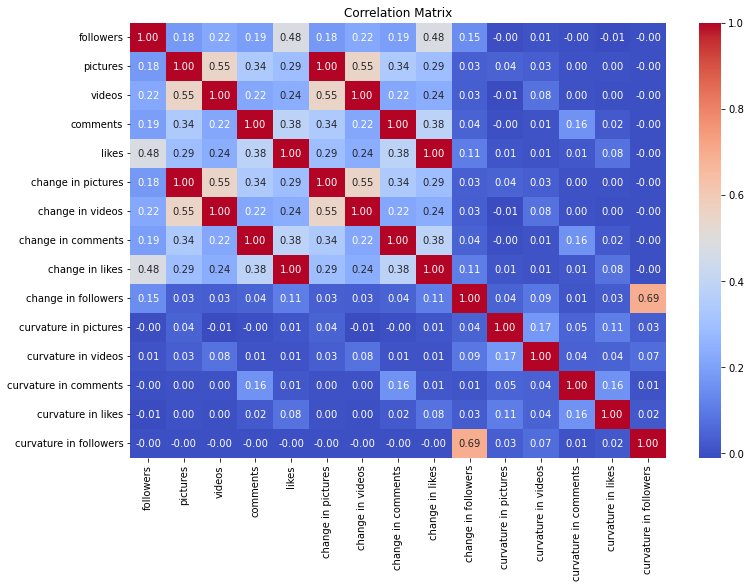

In [19]:
# Plot the heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
df_rate_plots = df_rate.copy()
df_rate_plots['period_end_date'] = pd.to_datetime(df_rate_plots['period_end_date'])

df_curvature_plots = df_curvature.copy()
df_curvature_plots['period_end_date'] = pd.to_datetime(df_curvature_plots['period_end_date'])

companies = df_rate_plots['business_entity_doing_business_as_name'].unique()

In [42]:
plt.figure(figsize=(12,8))
for company in companies[20:30]:
    index = df_rate_plots['business_entity_doing_business_as_name'] == company
    plt.plot(df_rate_plots.loc[index, 'period_end_date'], df_rate_plots.loc[index, 'change in followers'], 
             label=company)
plt.ylim(-50000,150000)
plt.xlabel('time')
plt.ylabel('weekly change in followers')
plt.legend()
plt.show()

In [60]:
plt.figure(figsize=(12,8))
df_rate_filtered = df_rate_plots[(df_rate_plots != 0).all(axis=1)]
df_curv_filtered = df_curvature_plots[(df_rate_plots != 0).all(axis=1)]
for company in companies:
    index = (df_rate_filtered['business_entity_doing_business_as_name'] == company)
    
    plt.scatter(df_rate_filtered.loc[index, 'change in followers'], df_curv_filtered.loc[index, 'curvature in followers'],
             label=company, s=10)
#plt.ylim(-75000,75000)
plt.xlabel('change in followers')
plt.ylabel('curvature in followers')
#plt.legend()
plt.show()

In [62]:
plt.figure(figsize=(12,8))
for company in companies:
    index = df_rate_plots['business_entity_doing_business_as_name'] == company
    #df_rate_filtered = df_rate_plots[(df_rate_plots != 0).all(axis=1)]
    #df_curv_filtered = df_curvature_plots[(df_rate_plots != 0).all(axis=1)]
    plt.scatter(df_rate_plots.loc[index, 'change in pictures'], df_rate_plots.loc[index, 'change in videos'],
             label=company, s=10)
#plt.ylim(-75000,75000)
plt.xlabel('number of pictures per week')
plt.ylabel('number of videos per week')
#plt.legend()
plt.show()

change in likes over 4 weeks against change in followers

In [131]:
brands_by_cgroup = {} # dict: list of brands contained in each compset_group
for group in compset_groups:
    brands_by_cgroup[group] = df_brands[df_brands['compset_group'] == group][
        'business_entity_doing_business_as_name'].tolist()

cgroup_ranking = {cgroup: df[df['business_entity_doing_business_as_name'].isin(brands_by_cgroup[cgroup])] for cgroup in compset_groups}
compset_groups = df_brands['compset_group'].unique()


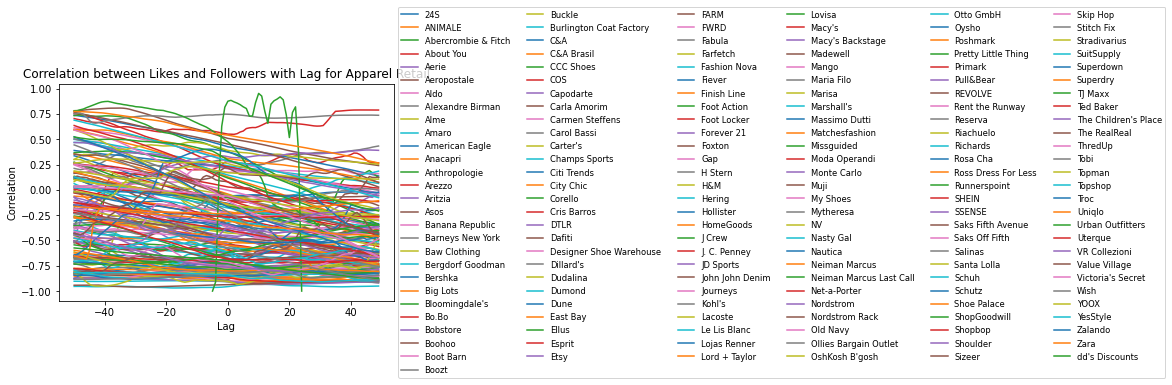

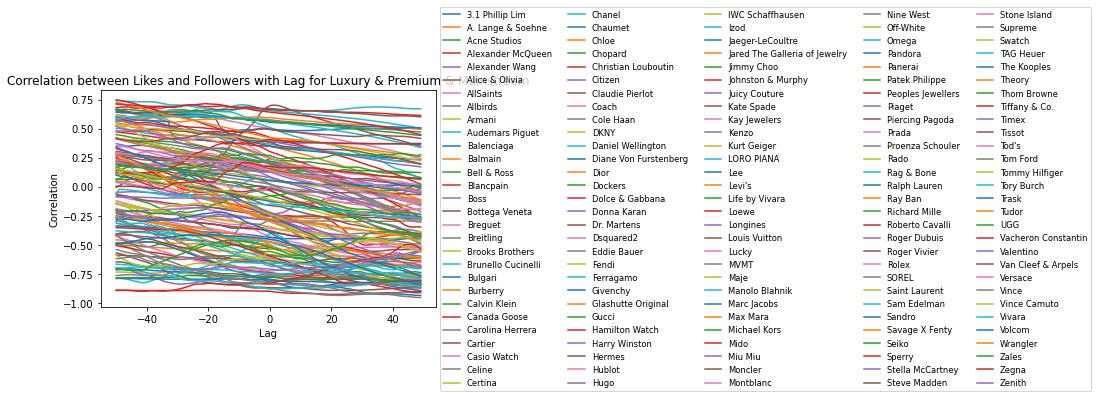

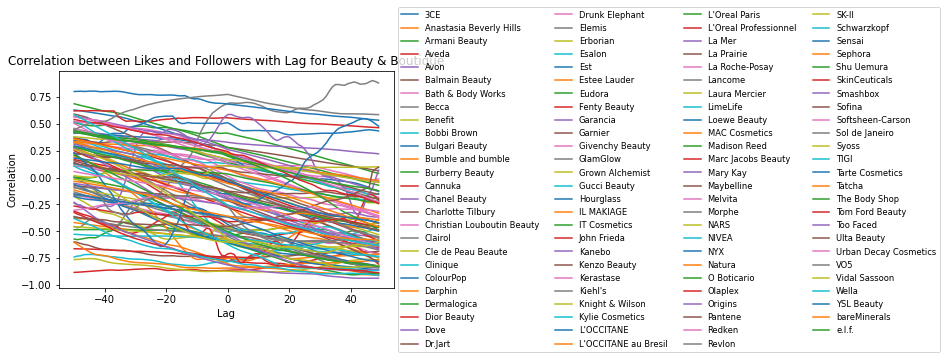

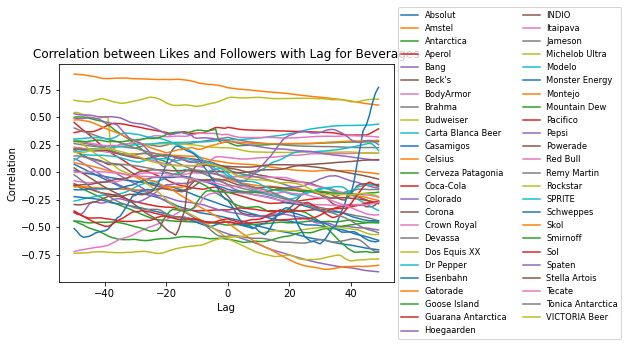

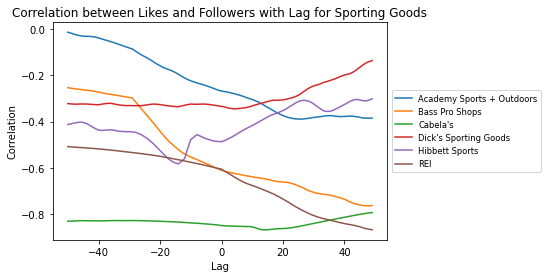

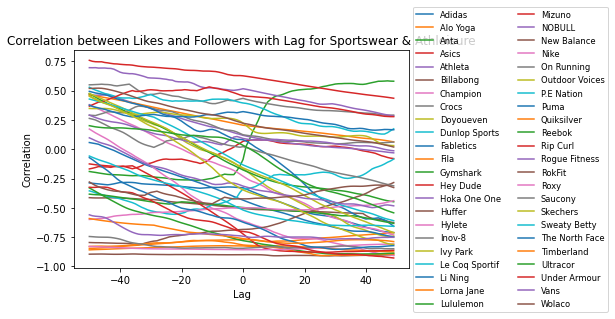

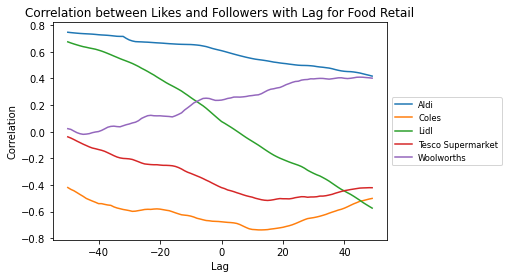

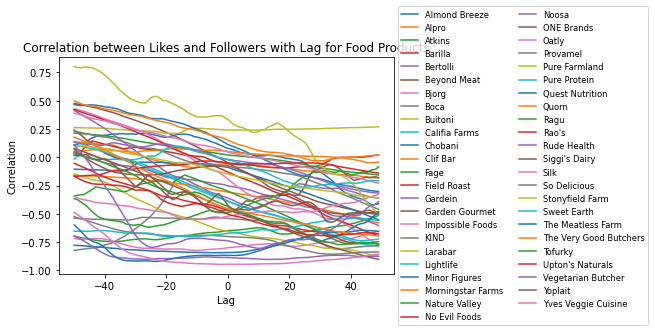

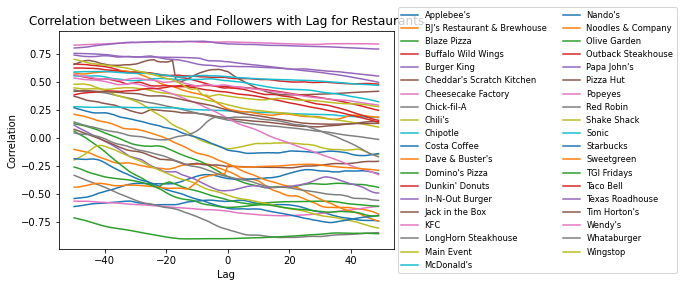

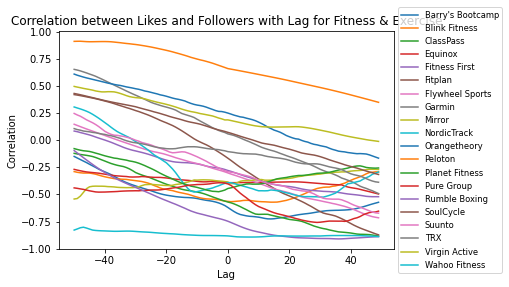

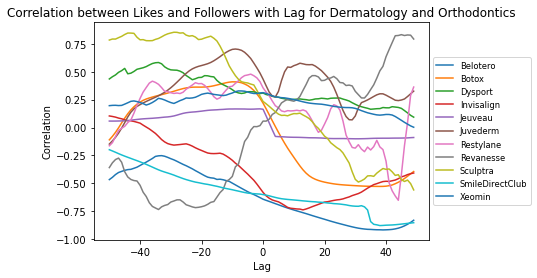

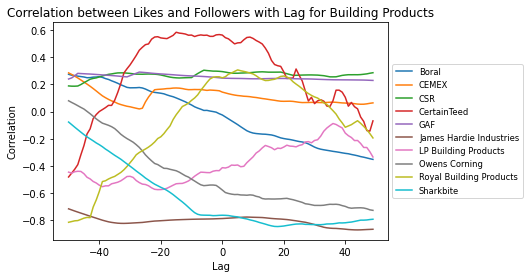

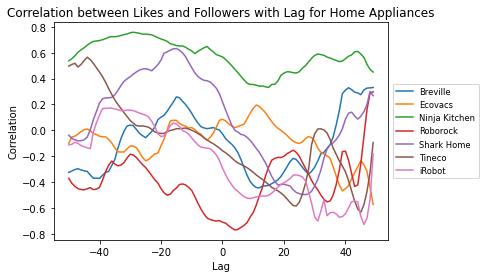

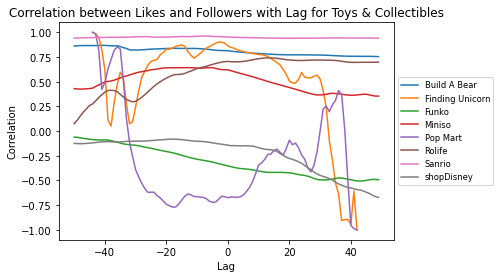

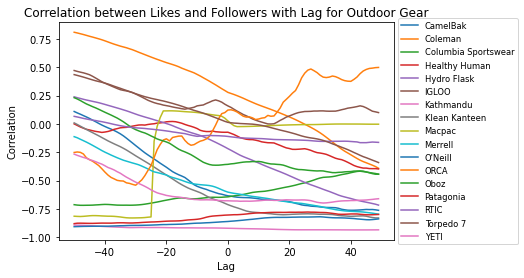

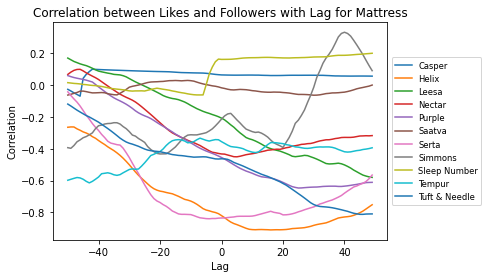

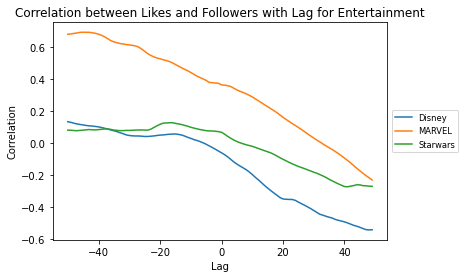

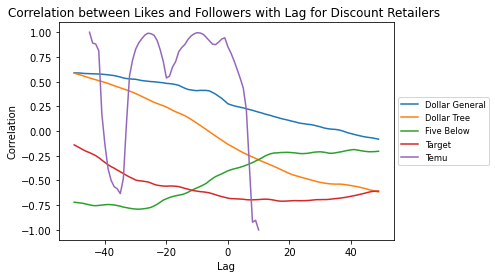

In [137]:
import math
for cgroup in compset_groups:
    plt.figure()
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        corr_results = []
        for lag in range(-50, 50):
            corr_results.append(data['likes'].corr(data['followers'].shift(lag)))
        plt.plot(range(-50, 50), corr_results, label=brand)  # Use 'brand' instead of 'label'

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.title(f'Correlation between Likes and Followers with Lag for {cgroup}')  # Use 'cgroup' instead of 'compset_group'
    plt.show()


In [138]:
brands_by_cgroup = {} # dict: list of brands contained in each compset_group
for group in compset_groups:
    brands_by_cgroup[group] = df_brands[df_brands['compset_group'] == group][
        'business_entity_doing_business_as_name'].tolist()

cgroup_ranking = {cgroup: df_rate[df_rate['business_entity_doing_business_as_name'].isin(brands_by_cgroup[cgroup])] for cgroup in compset_groups}
compset_groups = df_brands['compset_group'].unique()

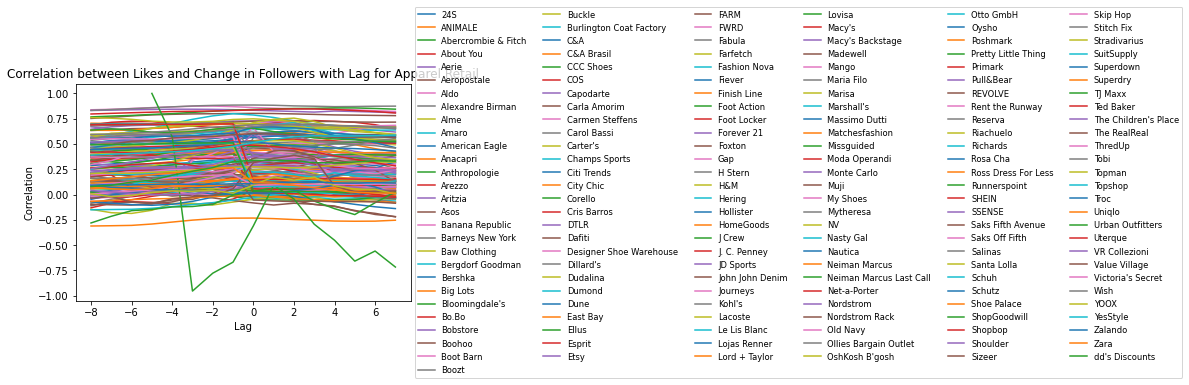

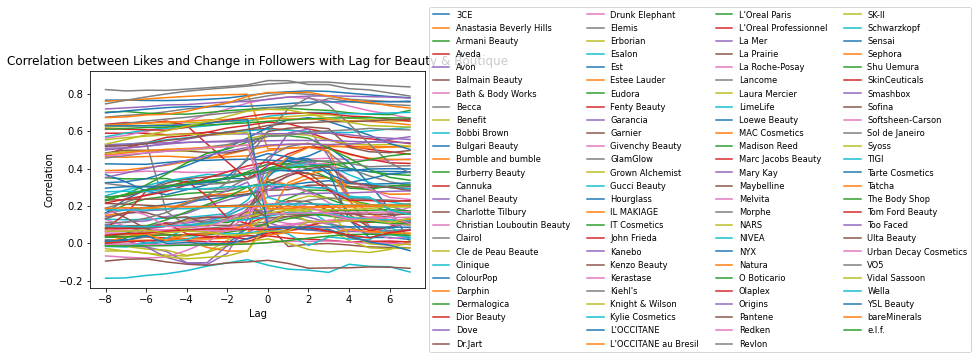

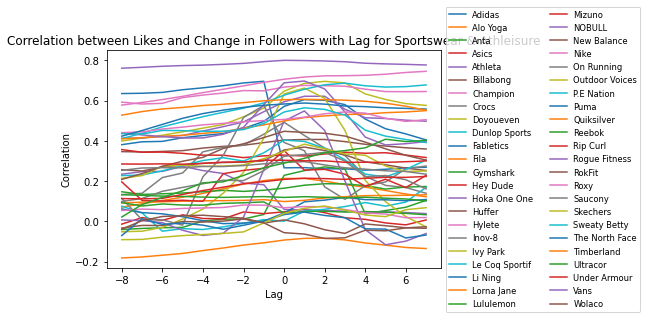

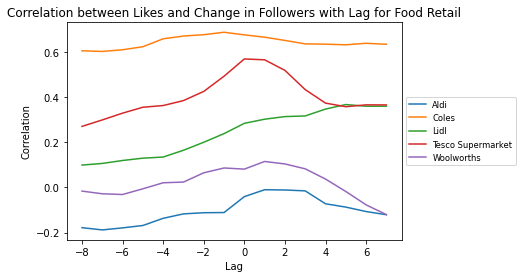

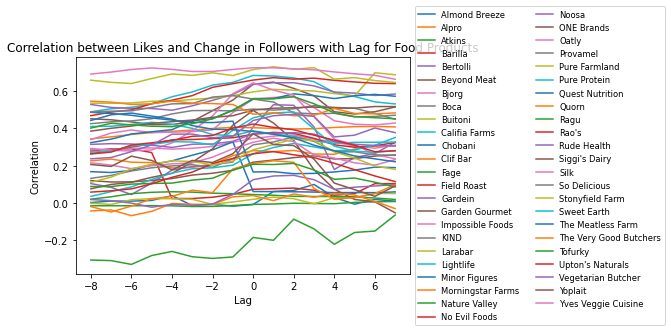

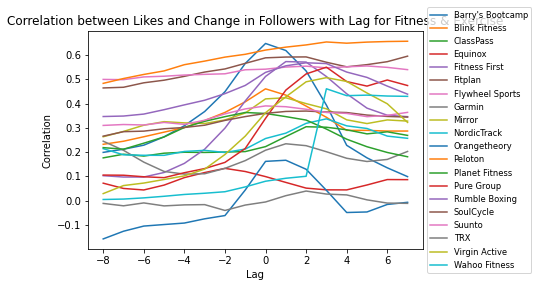

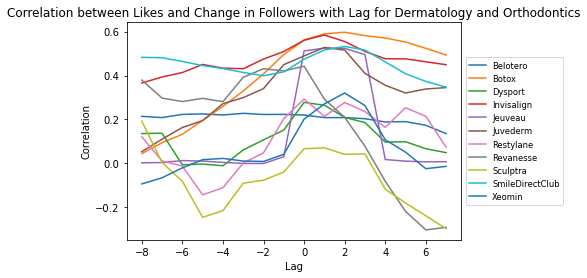

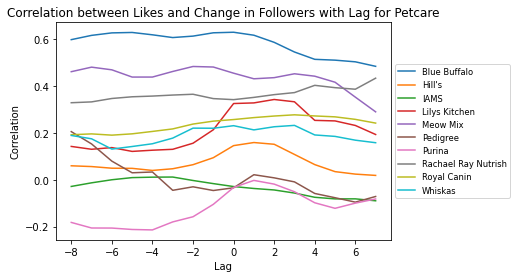

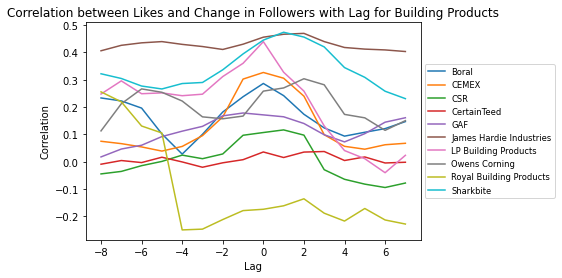

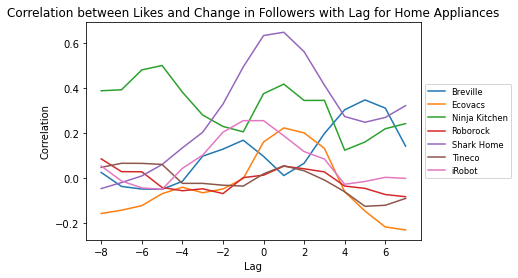

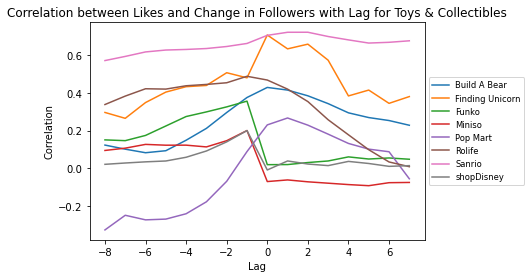

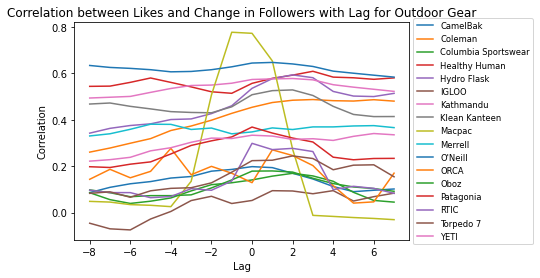

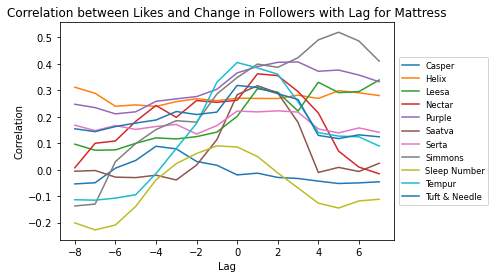

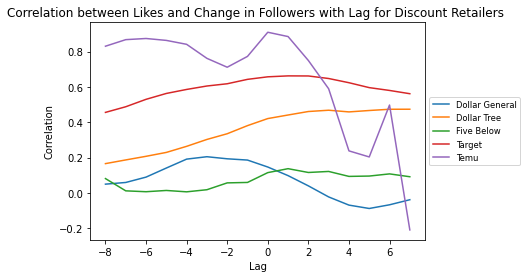

In [141]:
for cgroup in compset_groups:
    plt.figure()
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        corr_results = []
        for lag in range(-8, 8):
            corr_results.append(data['change in likes'].corr(data['change in followers'].shift(lag)))
        plt.plot(range(-8, 8), corr_results, label=brand)  # Use 'brand' instead of 'label'

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.title(f'Correlation between Likes and Change in Followers with Lag for {cgroup}')  # Use 'cgroup' instead of 'compset_group'
    plt.show()

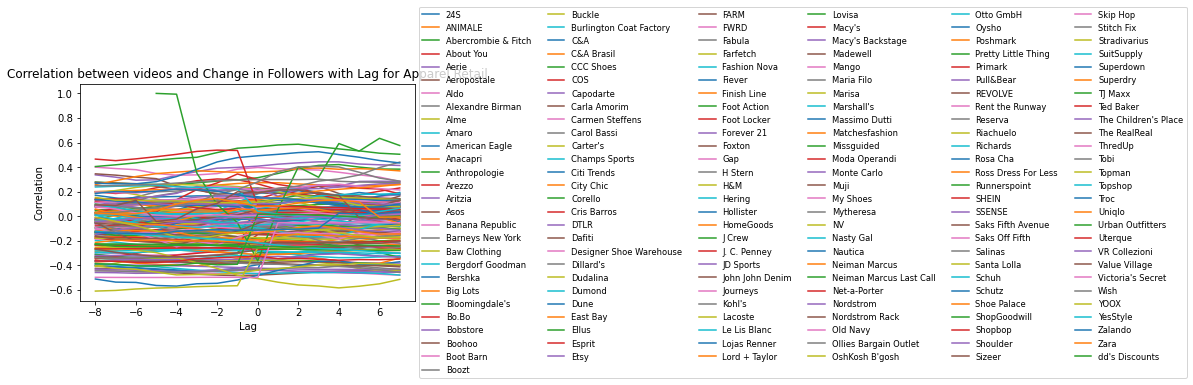

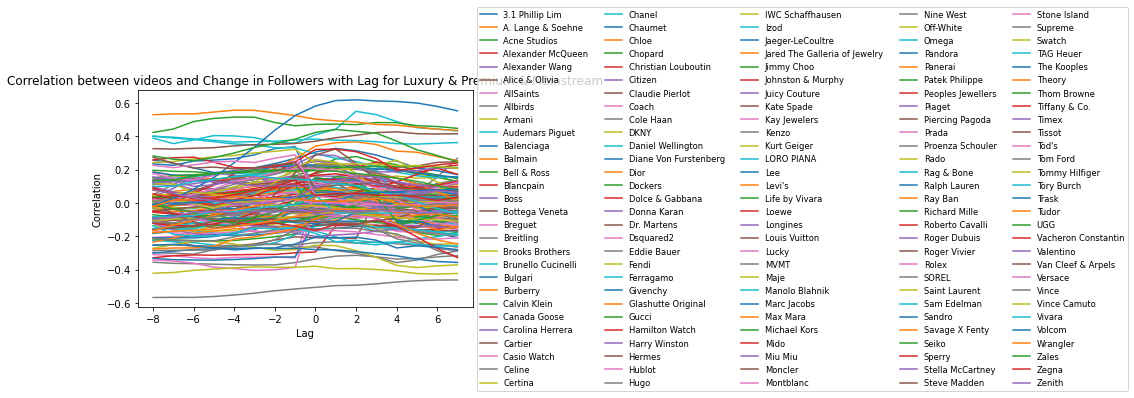

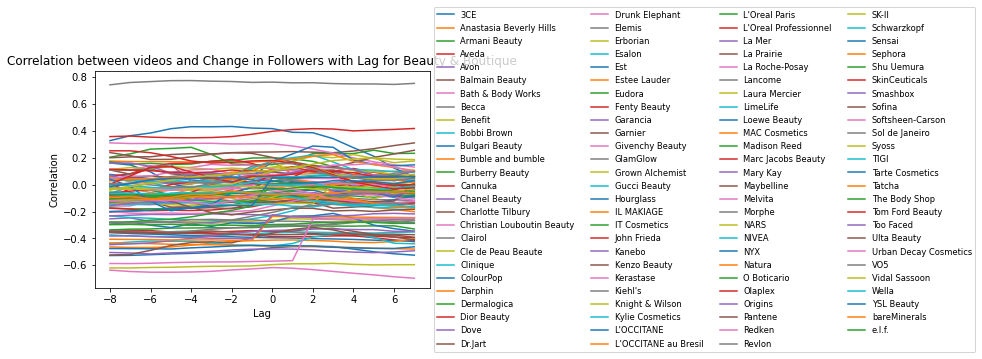

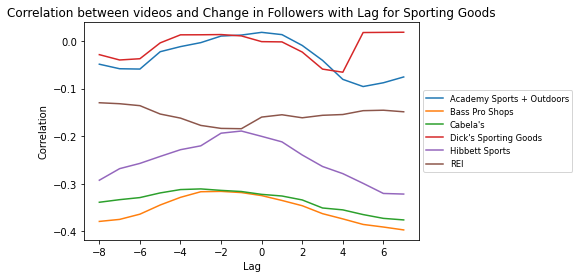

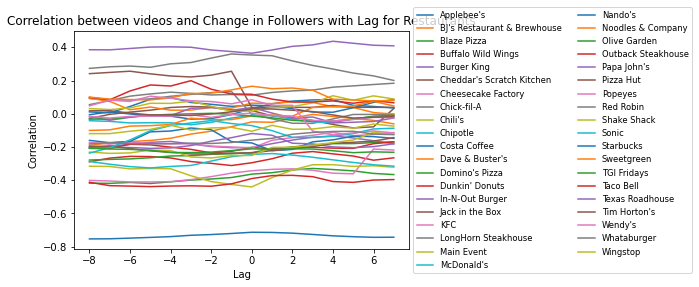

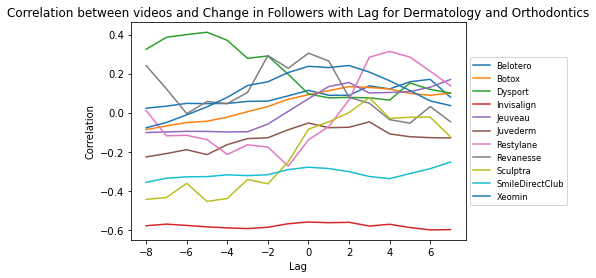

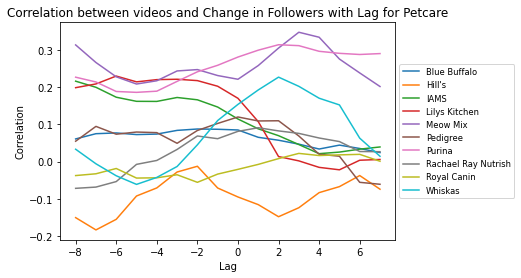

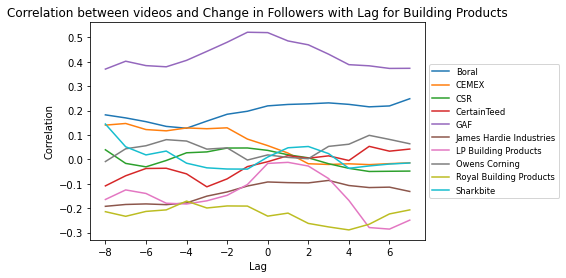

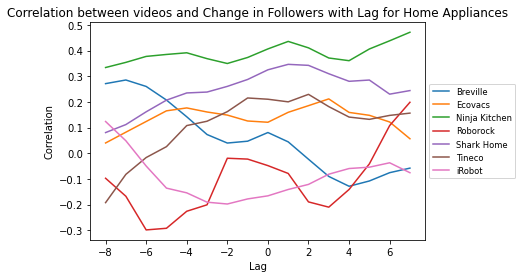

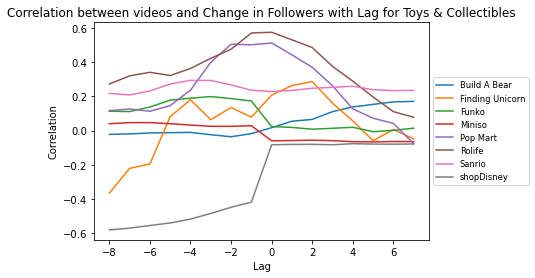

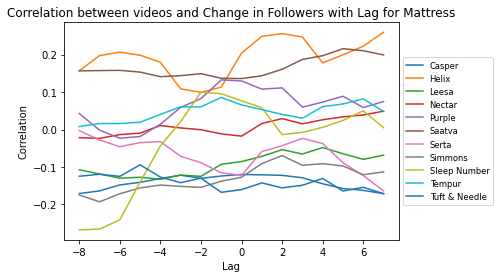

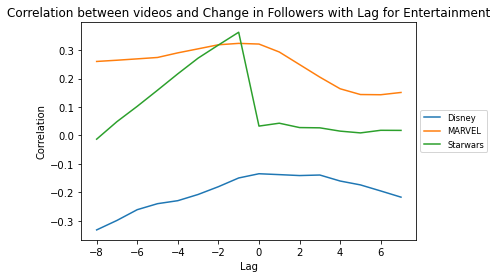

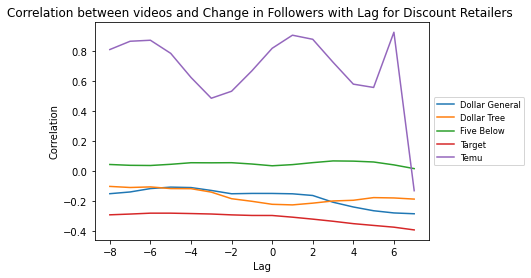

In [142]:
for cgroup in compset_groups:
    plt.figure()
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        corr_results = []
        for lag in range(-8, 8):
            corr_results.append(data['change in videos'].corr(data['change in followers'].shift(lag)))
        plt.plot(range(-8, 8), corr_results, label=brand)  # Use 'brand' instead of 'label'

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.title(f'Correlation between videos and Change in Followers with Lag for {cgroup}')  # Use 'cgroup' instead of 'compset_group'
    plt.show()

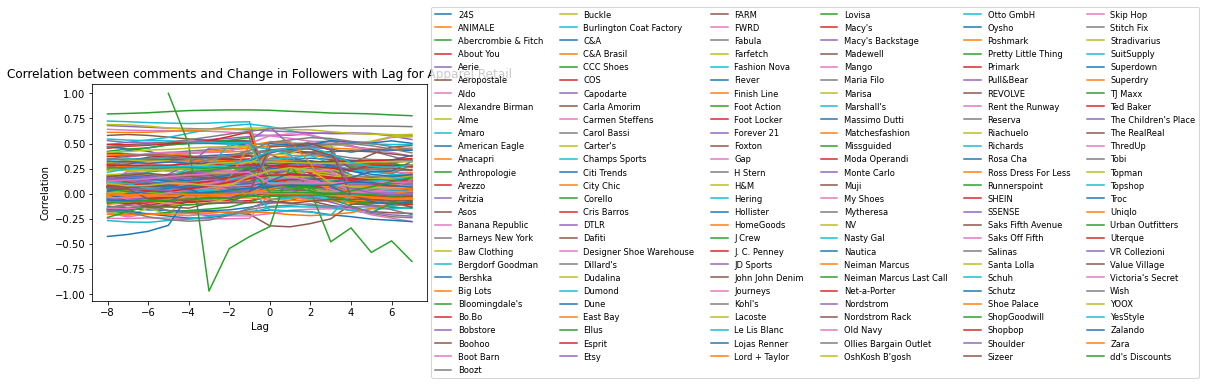

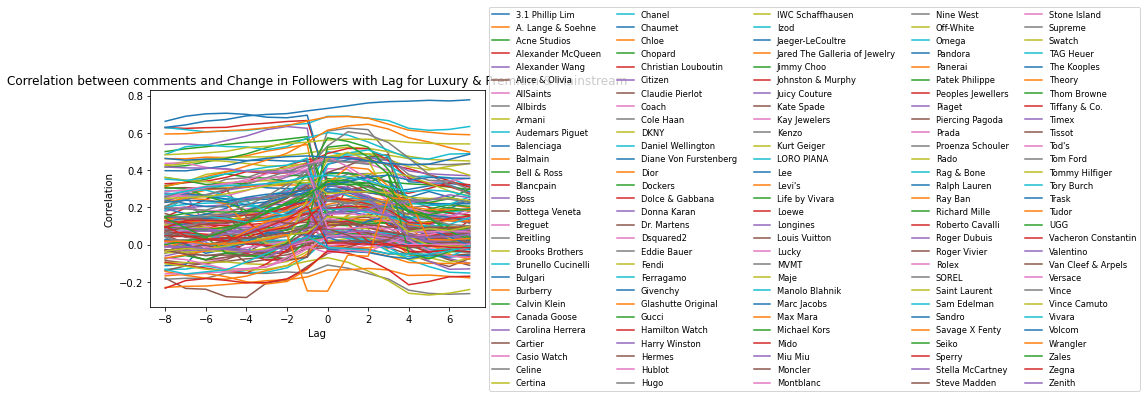

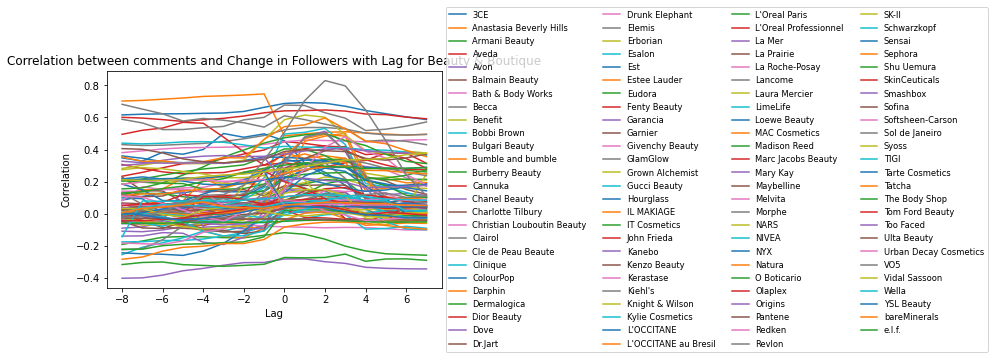

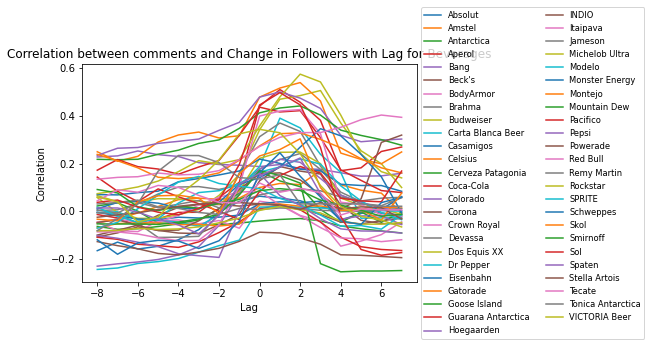

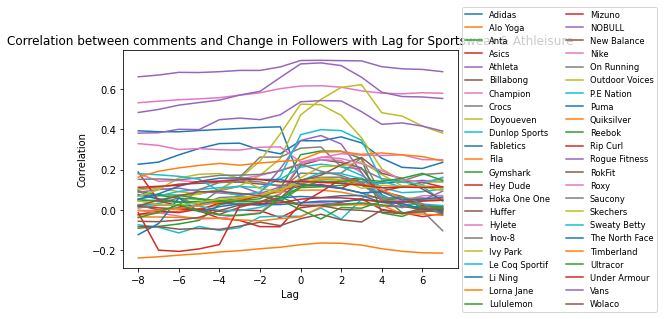

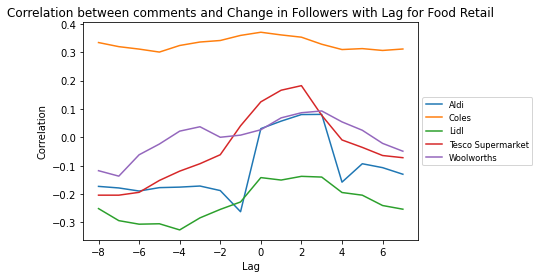

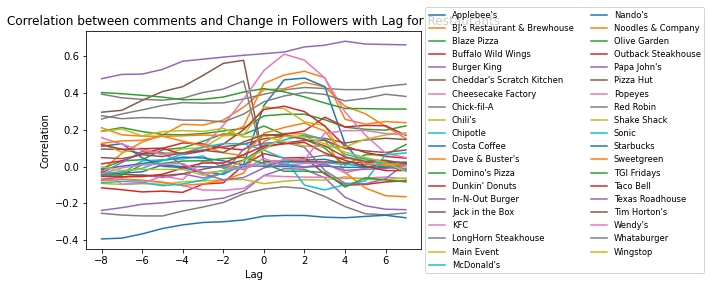

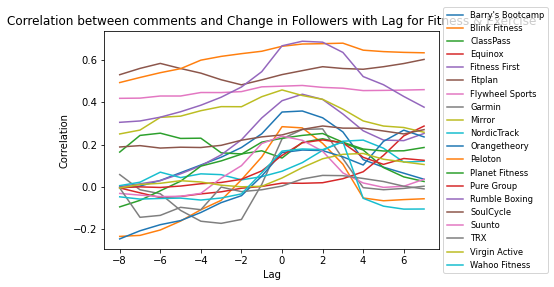

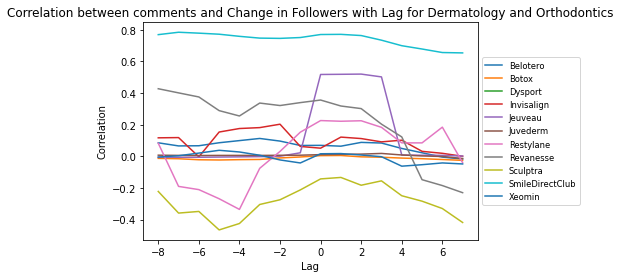

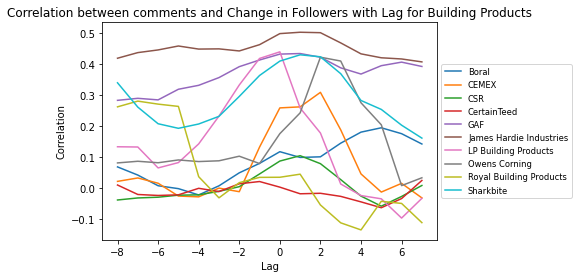

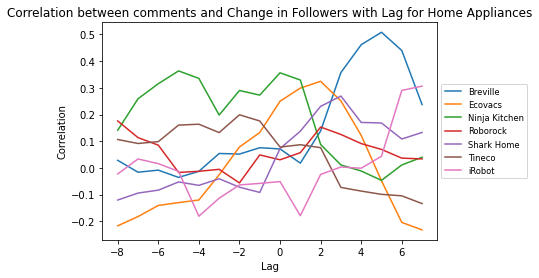

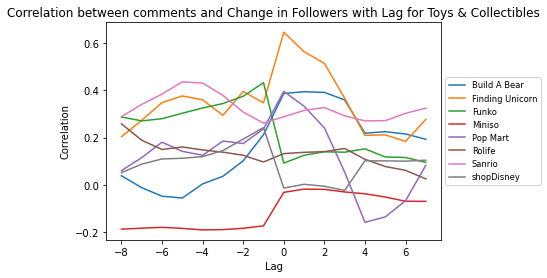

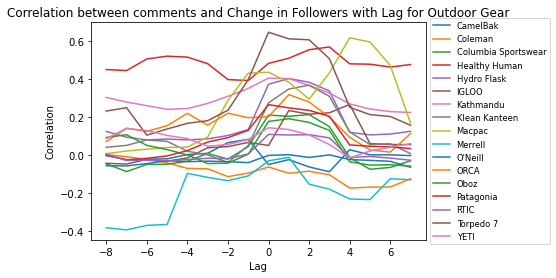

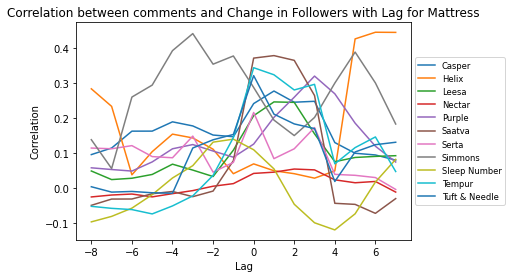

In [143]:
for cgroup in compset_groups:
    plt.figure()
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        corr_results = []
        for lag in range(-8, 8):
            corr_results.append(data['change in comments'].corr(data['change in followers'].shift(lag)))
        plt.plot(range(-8, 8), corr_results, label=brand)  # Use 'brand' instead of 'label'

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.title(f'Correlation between comments and Change in Followers with Lag for {cgroup}')  # Use 'cgroup' instead of 'compset_group'
    plt.show()